**Questão 8**

In [1]:
# Importação das bibliotecas necessárias
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import binary_erosion

img1 = cv2.imread("Book_1.png", cv2.IMREAD_GRAYSCALE) # Lê a imagem Book_1 em tons de cinza
img2 = cv2.imread("Book_2.png", cv2.IMREAD_GRAYSCALE) # Lê a imagem Book_2 em tons de cinza

# Letra A, recorte da própria imagem, justificativa:
# - Se usarmos uma outra imagem da letra 'A' (de tamanho, espessura ou fonte diferentes), a busca falha.
letter_a = img1[355:386, 56:88] # Seleciona manualmente uma região da imagem onde sabemos que existe a letra 'A'

# Converte o recorte da letra 'A' para uma imagem binária (preto e branco)
# Pixels mais escuros que o valor 127 viram brancos (1) e os mais claros viram pretos (0)
_, struct_A = cv2.threshold(letter_a, 127, 1, cv2.THRESH_BINARY_INV)

# Converte as imagens originais em imagens binárias
_, binary1 = cv2.threshold(img1, 127, 1, cv2.THRESH_BINARY_INV)
_, binary2 = cv2.threshold(img2, 127, 1, cv2.THRESH_BINARY_INV)

# Aplica a operação de erosão. A função binary_erosion usa a imagem da letra 'A' como template (estrutura)
# para procura na imagem original locais onde a letra 'A' "encaixa"
eroded1 = binary_erosion(binary1, structure=struct_A)
eroded2 = binary_erosion(binary2, structure=struct_A)

# Verifica se em algum ponto da imagem a letra 'A' foi encontrada
# np.any(eroded) retorna True se houver pelo menos uma correspondência
found1 = np.any(eroded1)
found2 = np.any(eroded2)
# Imprime na tela se a letra 'A' foi encontrada ou não
print("A imagem Book_1.png possui a letra A?", "Sim" if found1 else "Não")
print("A imagem Book_2.png possui a letra A?", "Sim" if found2 else "Não")

A imagem Book_1.png possui a letra A? Sim
A imagem Book_2.png possui a letra A? Não


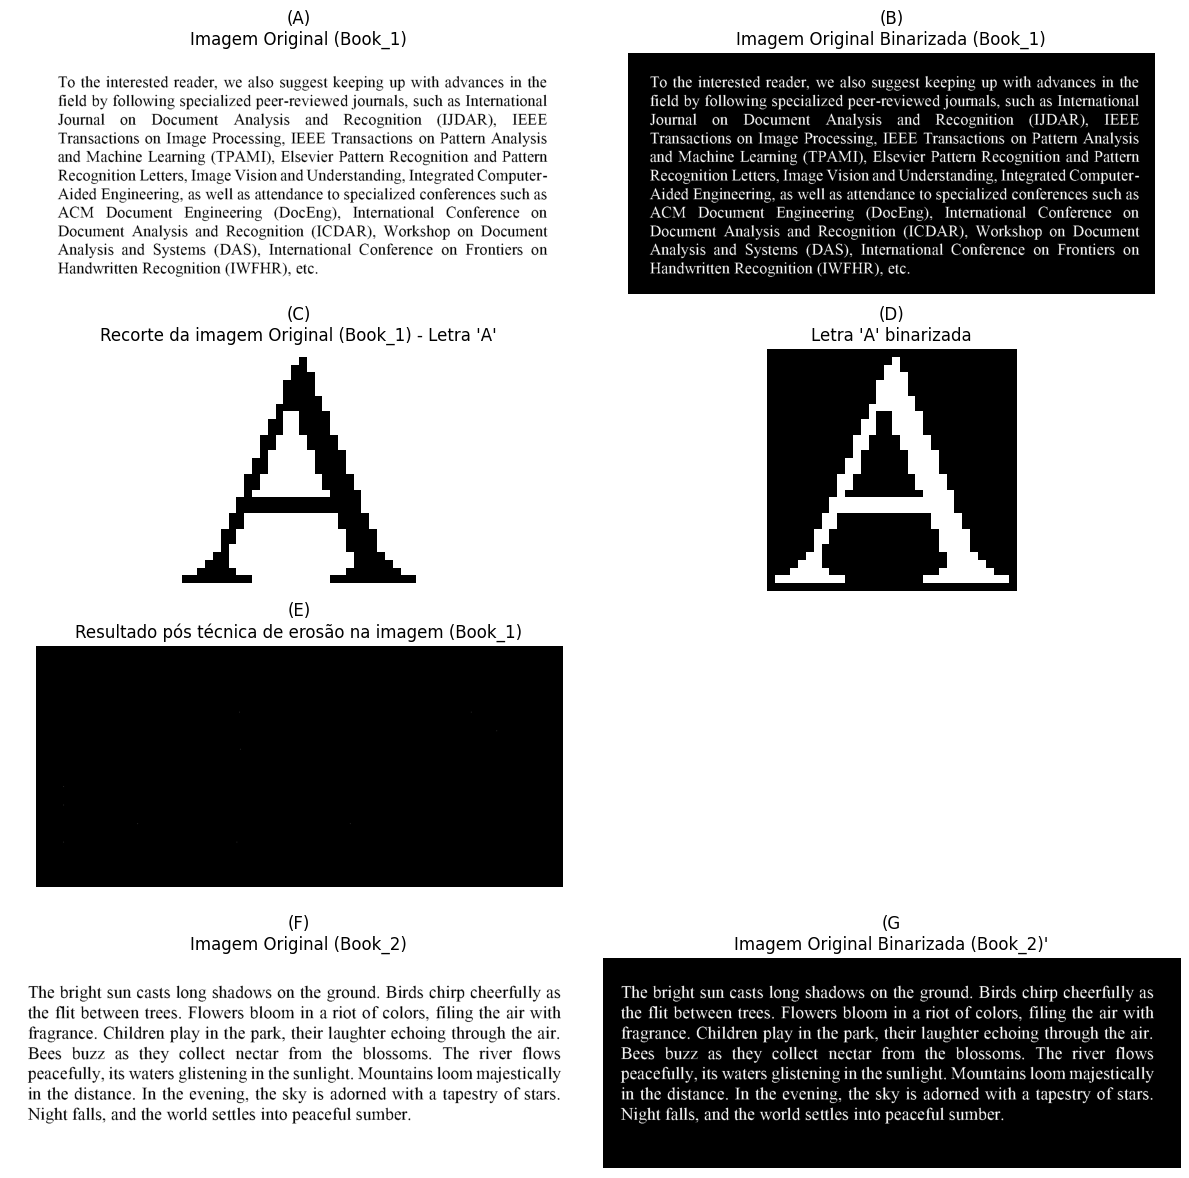

In [2]:
# Exibição das imagens geradas
fig, axs = plt.subplots(4, 2, figsize=(12, 12))
axs[0][0].imshow(img1, cmap='gray')
axs[0][0].set_title("(A)\nImagem Original (Book_1)")
axs[0][0].axis('off')

axs[0][1].imshow(binary1, cmap='gray')
axs[0][1].set_title("(B)\nImagem Original Binarizada (Book_1)")
axs[0][1].axis('off')

axs[1][0].imshow(letter_a, cmap='gray')
axs[1][0].set_title("(C)\nRecorte da imagem Original (Book_1) - Letra 'A'")
axs[1][0].axis('off')

axs[1][1].imshow(struct_A, cmap='gray')
axs[1][1].set_title("(D)\nLetra 'A' binarizada")
axs[1][1].axis('off')

axs[2][0].imshow(eroded1, cmap='gray')
axs[2][0].set_title("(E)\nResultado pós técnica de erosão na imagem (Book_1)")
axs[2][0].axis('off')
axs[2][1].axis('off')

axs[3][0].imshow(img2, cmap='gray')
axs[3][0].set_title("(F)\nImagem Original (Book_2)")
axs[3][0].axis('off')

axs[3][1].imshow(binary2, cmap='gray')
axs[3][1].set_title("(G\nImagem Original Binarizada (Book_2)'")
axs[3][1].axis('off')

plt.tight_layout()
plt.show()